In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [3]:
df = pd.read_csv('flight.csv')
df.head(5)

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE GENDER  FFP_TIER    WORK_CITY  \
0      54993  11/2/2006        12/24/2008   Male         6            .   
1      28065  2/19/2007          8/3/2007   Male         6          NaN   
2      55106   2/1/2007         8/30/2007   Male         6            .   
3      21189  8/22/2008         8/23/2008   Male         5  Los Angeles   
4      39546  4/10/2009         4/15/2009   Male         6      guiyang   

  WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  SUM_YR_2  SEG_KM_SUM  \
0       beijing           CN  31.0  3/31/2014  ...  234188.0      580717   
1       beijing           CN  42.0  3/31/2014  ...  167434.0      293678   
2       beijing           CN  40.0  3/31/2014  ...  164982.0      283712   
3            CA           US  64.0  3/31/2014  ...  125500.0      281336   
4       guizhou           CN  48.0  3/31/2014  ...  130702.0      309928   

   LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  EXCHANGE_COUNT  \
0         3/31/2014            1      3.483254           18              34   
1         3/25/2014            7      5.194245           17              29   
2         3/21/2014           11      5.298507           18              20   
3        12/26/2013           97     27.863636           73              11   
4         3/27/2014            5      4.788079           47              27   

   avg_discount  Points_Sum  Point_NotFlight  
0      0.961639      619760               50  
1      1.252314      415768               33  
2      1.254676      406361               26  
3      1.090870      372204               12  
4      0.970658      338813               39  

[5 rows x 23 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [5]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [6]:
((df.shape[0] - df.dropna().shape[0])/df.shape[0])*100

7.514129675493744

In [7]:
df.duplicated().sum()

0

In [8]:
data_missing_value = df.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(df))*100,3)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

feature  missing_value  percentage
0  WORK_PROVINCE           3248       5.157
1      WORK_CITY           2269       3.602
2       SUM_YR_1            551       0.875
3            AGE            420       0.667
4       SUM_YR_2            138       0.219
5   WORK_COUNTRY             26       0.041
6         GENDER              3       0.005

In [9]:
data_missing_value = df.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value

feature  missing_value
0           MEMBER_NO              0
1            FFP_DATE              0
2   FIRST_FLIGHT_DATE              0
3              GENDER              3
4            FFP_TIER              0
5           WORK_CITY           2269
6       WORK_PROVINCE           3248
7        WORK_COUNTRY             26
8                 AGE            420
9           LOAD_TIME              0
10       FLIGHT_COUNT              0
11             BP_SUM              0
12           SUM_YR_1            551
13           SUM_YR_2            138
14         SEG_KM_SUM              0
15   LAST_FLIGHT_DATE              0
16        LAST_TO_END              0
17       AVG_INTERVAL              0
18       MAX_INTERVAL              0
19     EXCHANGE_COUNT              0
20       avg_discount              0
21         Points_Sum              0
22    Point_NotFlight              0

In [10]:
missing_col = ['SUM_YR_1', 'AGE', 'SUM_YR_2', 'WORK_COUNTRY', 'GENDER']
for col in missing_col:
  df.dropna(subset=[col], inplace=True)

In [11]:
df['WORK_CITY'].fillna(df['WORK_CITY'].mode()[0], inplace=True)
df['WORK_PROVINCE'].fillna(df['WORK_PROVINCE'].mode()[0], inplace=True)

In [12]:
df.isna().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

In [13]:
df['AGE'] = df['AGE'].astype(int)

In [14]:
date_col = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME','LAST_FLIGHT_DATE']
for col in date_col:
  df[col] = pd.to_datetime(df[col])

ValueError: time data "2014/2/29  0:00:00" doesn't match format "%m/%d/%Y", at position 65. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [15]:
df[df.LAST_FLIGHT_DATE.str.contains('2014/2/29')]

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER     WORK_CITY  \
248        56497 2007-06-17        2007-06-17  Female         6     guangzhou   
447        17306 2009-08-26        2010-04-29    Male         5       haerbin   
473          915 2006-11-10        2007-01-26    Male         5             .   
832        20336 2005-07-13        2005-08-06    Male         5     guangzhou   
1051       62884 2006-05-24        2007-04-21    Male         5         wuhan   
...          ...        ...               ...     ...       ...           ...   
61539      55995 2013-01-11        2013-07-10    Male         4     dalianshi   
61871      48742 2009-07-26        2009-07-26    Male         4       tianjin   
61909       9190 2011-04-11        2011-04-20    Male         4     guangzhou   
62721      38776 2007-10-31        2008-03-13    Male         4        foshan   
62929      46449 2010-02-07        2010-07-31    Male         4  guangzhoushi   

      WORK_PROVINCE WORK_COUNTRY  AGE  LOAD_TIME  ...  SUM_YR_2  SEG_KM_SUM  \
248       guangdong           CN   46 2014-03-31  ...   70845.0       85000   
447    heilongjiang           CN   70 2014-03-31  ...   46323.0       69453   
473         beijing           CN   39 2014-03-31  ...   30580.0       65717   
832       guangdong           CN   40 2014-03-31  ...   36417.0      114222   
1051          hubei           CN   50 2014-03-31  ...   35680.0       49859   
...             ...          ...  ...        ...  ...       ...         ...   
61539      liaoning           CN   23 2014-03-31  ...     955.0        3513   
61871       tianjin           CN   37 2014-03-31  ...     966.0        1298   
61909     guangdong           CN   34 2014-03-31  ...     853.0        2595   
62721     guangdong           CN   42 2014-03-31  ...     688.0        1199   
62929     guangdong           CN   24 2014-03-31  ...     401.0        1312   

         LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  \
248    2014/2/29  0:00:00           32     13.250000           57   
447    2014/2/29  0:00:00           32     22.766667           75   
473    2014/2/29  0:00:00           32     14.250000           65   
832    2014/2/29  0:00:00           32      8.696203           34   
1051   2014/2/29  0:00:00           32     19.115385           72   
...                   ...          ...           ...          ...   
61539  2014/2/29  0:00:00           32    117.000000          211   
61871  2014/2/29  0:00:00           32    135.000000          135   
61909  2014/2/29  0:00:00           32      1.000000            1   
62721  2014/2/29  0:00:00           32     78.000000           78   
62929  2014/2/29  0:00:00           32     43.000000           43   

       EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  
248                 0      1.373478      132653                4  
447                 6      1.375395      101413                7  
473                 1      1.425974       93153                8  
832                 2      0.664970       91476               15  
1051                4      1.388584       69047                4  
...               ...           ...         ...              ...  
61539               0      0.276667           0                0  
61871               0      0.690000        1094                1  
61909               0      0.340000        3356               19  
62721               0      0.489525         276                0  
62929               0      0.275000        1211                3  

[419 rows x 23 columns]

In [16]:
print('Incorrect `LAST_FLIGHT_DATE` data percentage: ', end='\n\n')
print(str(round(df[df.LAST_FLIGHT_DATE.str.contains('2014/2/29')]['LAST_FLIGHT_DATE'].count()/len(df), 3)), '%')

Incorrect `LAST_FLIGHT_DATE` data percentage: 

0.007 %


In [17]:
df.drop(df[df.LAST_FLIGHT_DATE.str.contains('2014/2/29')].index, inplace = True)

In [18]:
df[df.LAST_FLIGHT_DATE.str.contains('2014/2/29')]['LAST_FLIGHT_DATE'].count()

0

In [19]:
date_col = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME','LAST_FLIGHT_DATE']
for col in date_col:
  df[col] = pd.to_datetime(df[col])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61437 entries, 0 to 62986
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          61437 non-null  int64         
 1   FFP_DATE           61437 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  61437 non-null  datetime64[ns]
 3   GENDER             61437 non-null  object        
 4   FFP_TIER           61437 non-null  int64         
 5   WORK_CITY          61437 non-null  object        
 6   WORK_PROVINCE      61437 non-null  object        
 7   WORK_COUNTRY       61437 non-null  object        
 8   AGE                61437 non-null  int32         
 9   LOAD_TIME          61437 non-null  datetime64[ns]
 10  FLIGHT_COUNT       61437 non-null  int64         
 11  BP_SUM             61437 non-null  int64         
 12  SUM_YR_1           61437 non-null  float64       
 13  SUM_YR_2           61437 non-null  float64       
 14  SEG_KM_SUM 

In [21]:
numeric = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == 'float64' ) | (df.dtypes == float ) | (df.dtypes == int )].columns.tolist()
numeric

['MEMBER_NO',
 'FFP_TIER',
 'AGE',
 'FLIGHT_COUNT',
 'BP_SUM',
 'SUM_YR_1',
 'SUM_YR_2',
 'SEG_KM_SUM',
 'LAST_TO_END',
 'AVG_INTERVAL',
 'MAX_INTERVAL',
 'EXCHANGE_COUNT',
 'avg_discount',
 'Points_Sum',
 'Point_NotFlight']

In [22]:
categorical = df.loc[:, (df.dtypes != 'int64') & (df.dtypes != 'float64') & (df.dtypes != int) & (df.dtypes != float) & (df.columns != 'publish_daytype') & ((df.columns != 'trending_daytype'))].columns.tolist()
categorical

['FFP_DATE',
 'FIRST_FLIGHT_DATE',
 'GENDER',
 'WORK_CITY',
 'WORK_PROVINCE',
 'WORK_COUNTRY',
 'LOAD_TIME',
 'LAST_FLIGHT_DATE']

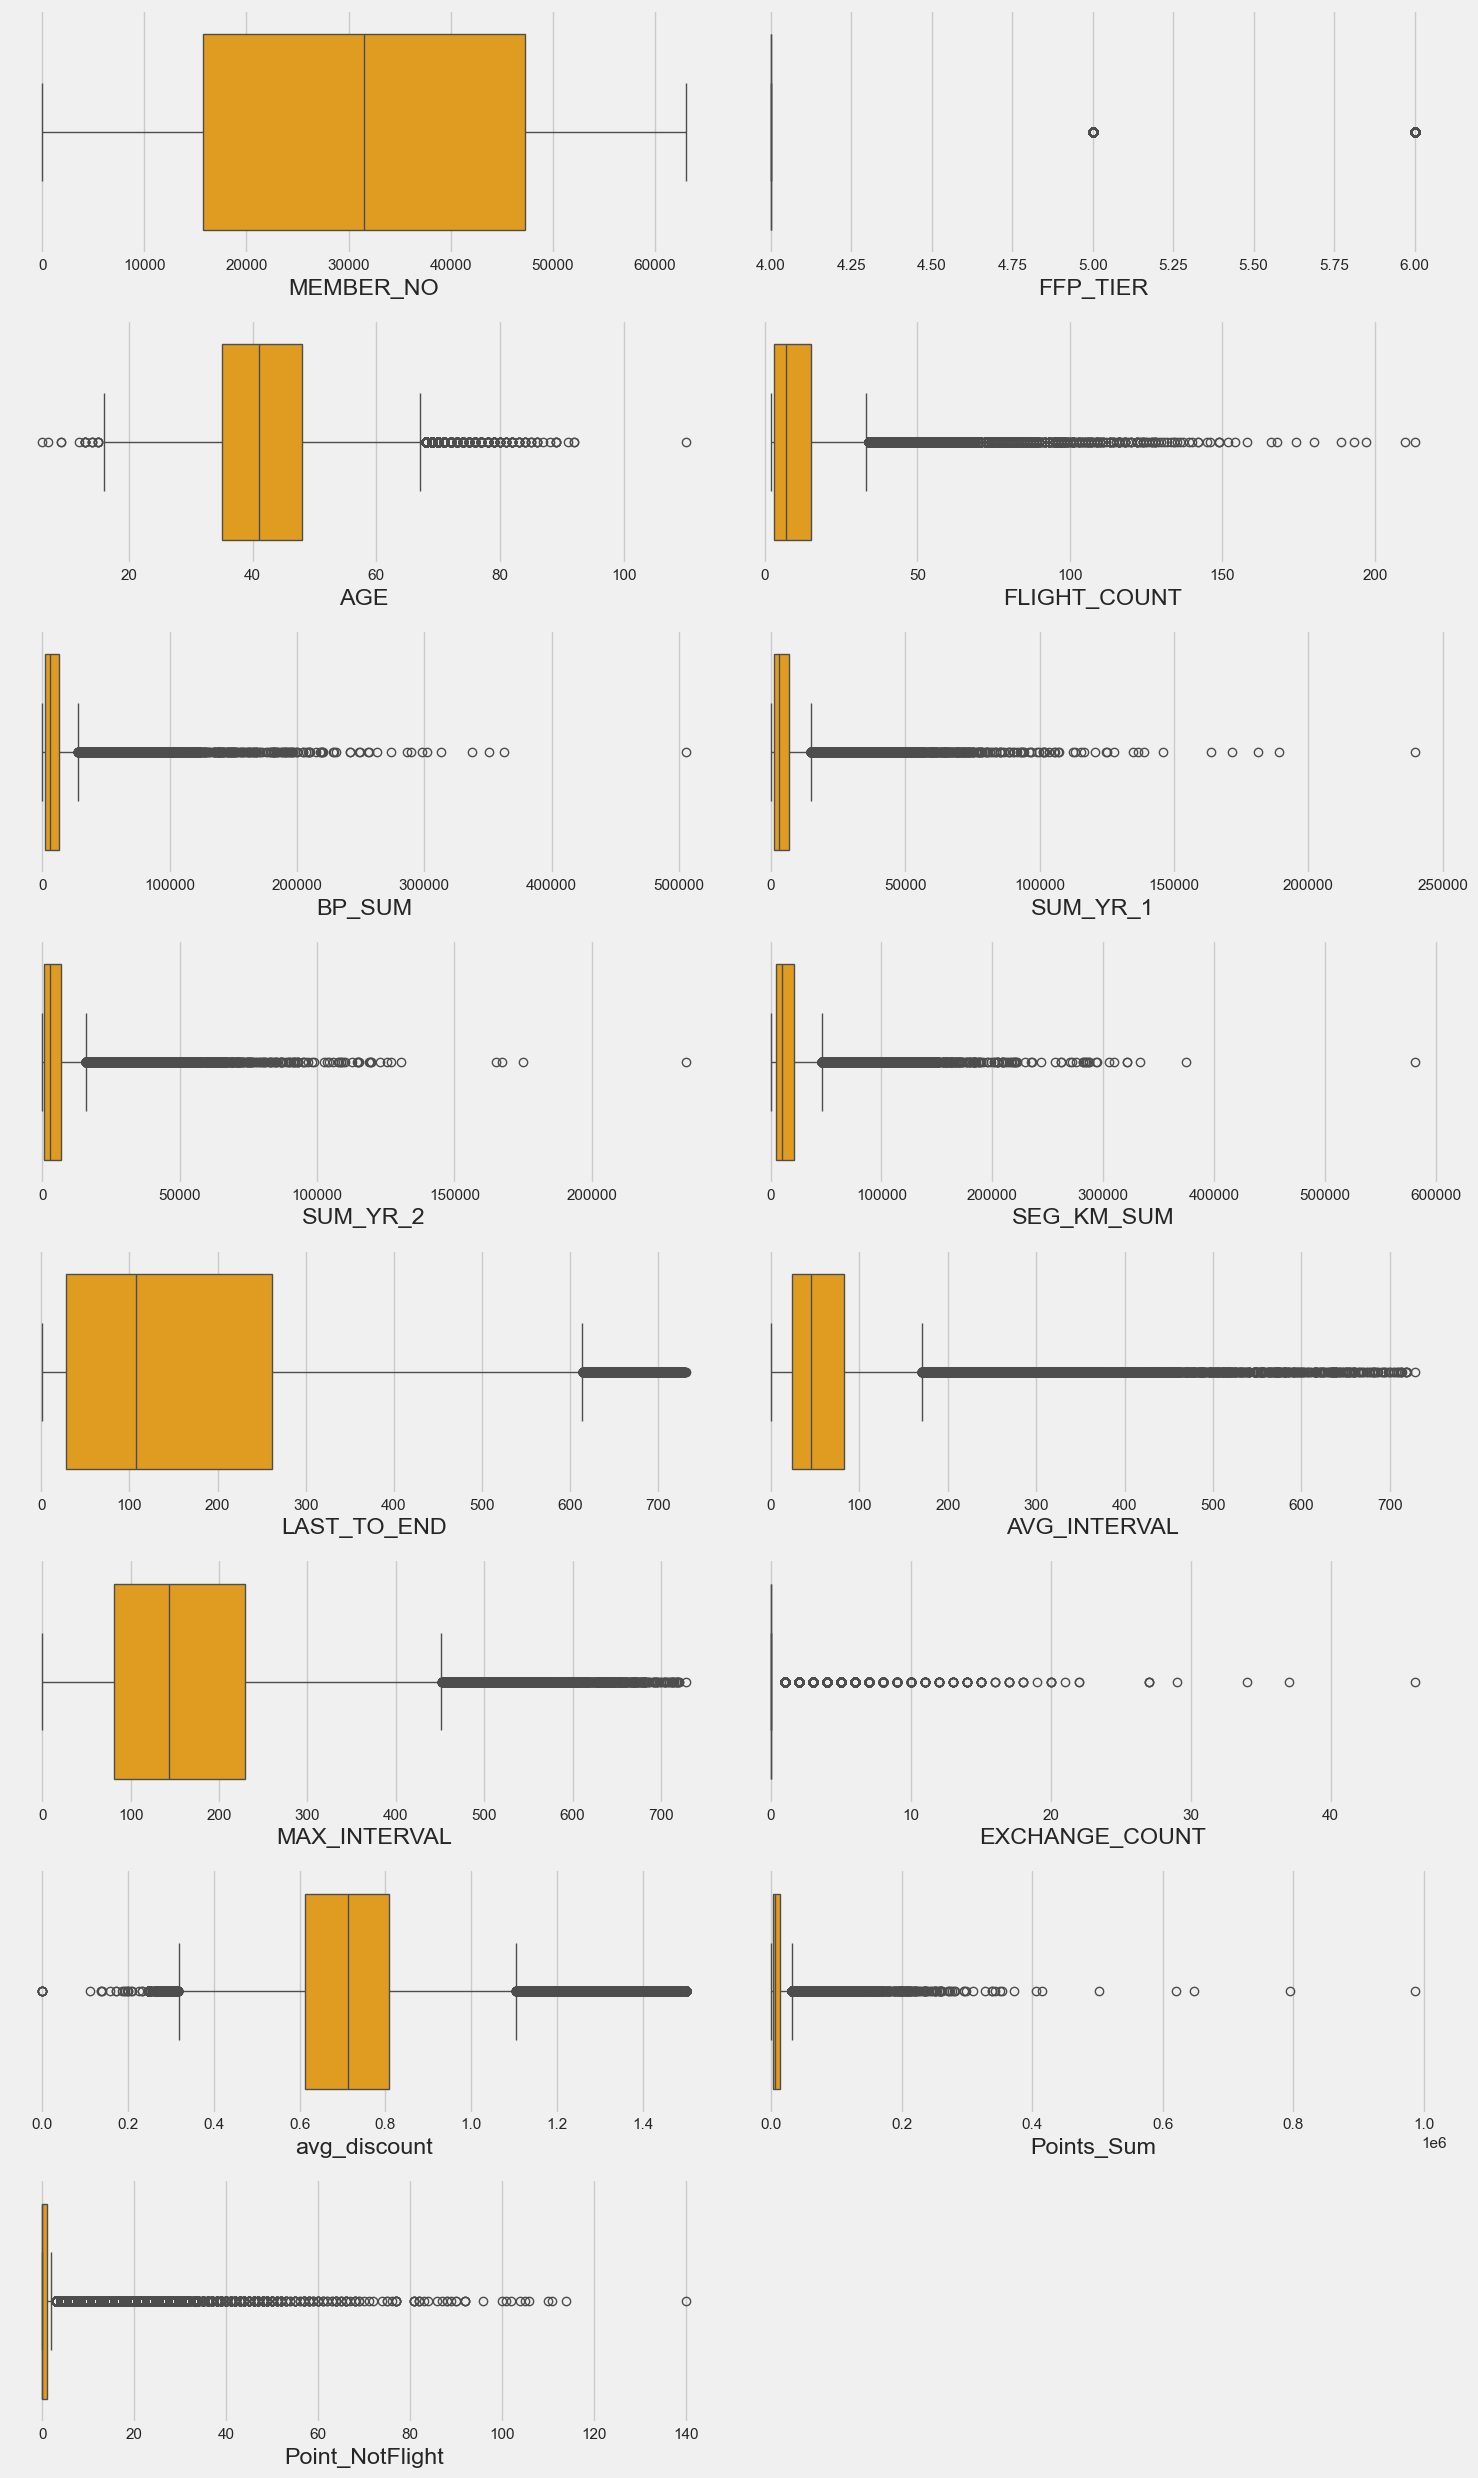

In [23]:
plt.figure(figsize=(15, 25))
for i in range(0, len(numeric)):
    plt.subplot(8, 2, i+1)
    sns.boxplot(x=df[numeric[i]], color='orange')
    plt.tight_layout()

plt.show()


Based on the box plot observations:

Most columns exhibit outliers, with the exception of the MEMBER_NO, FFP_TIER, and MEMBER_DURATION columns.

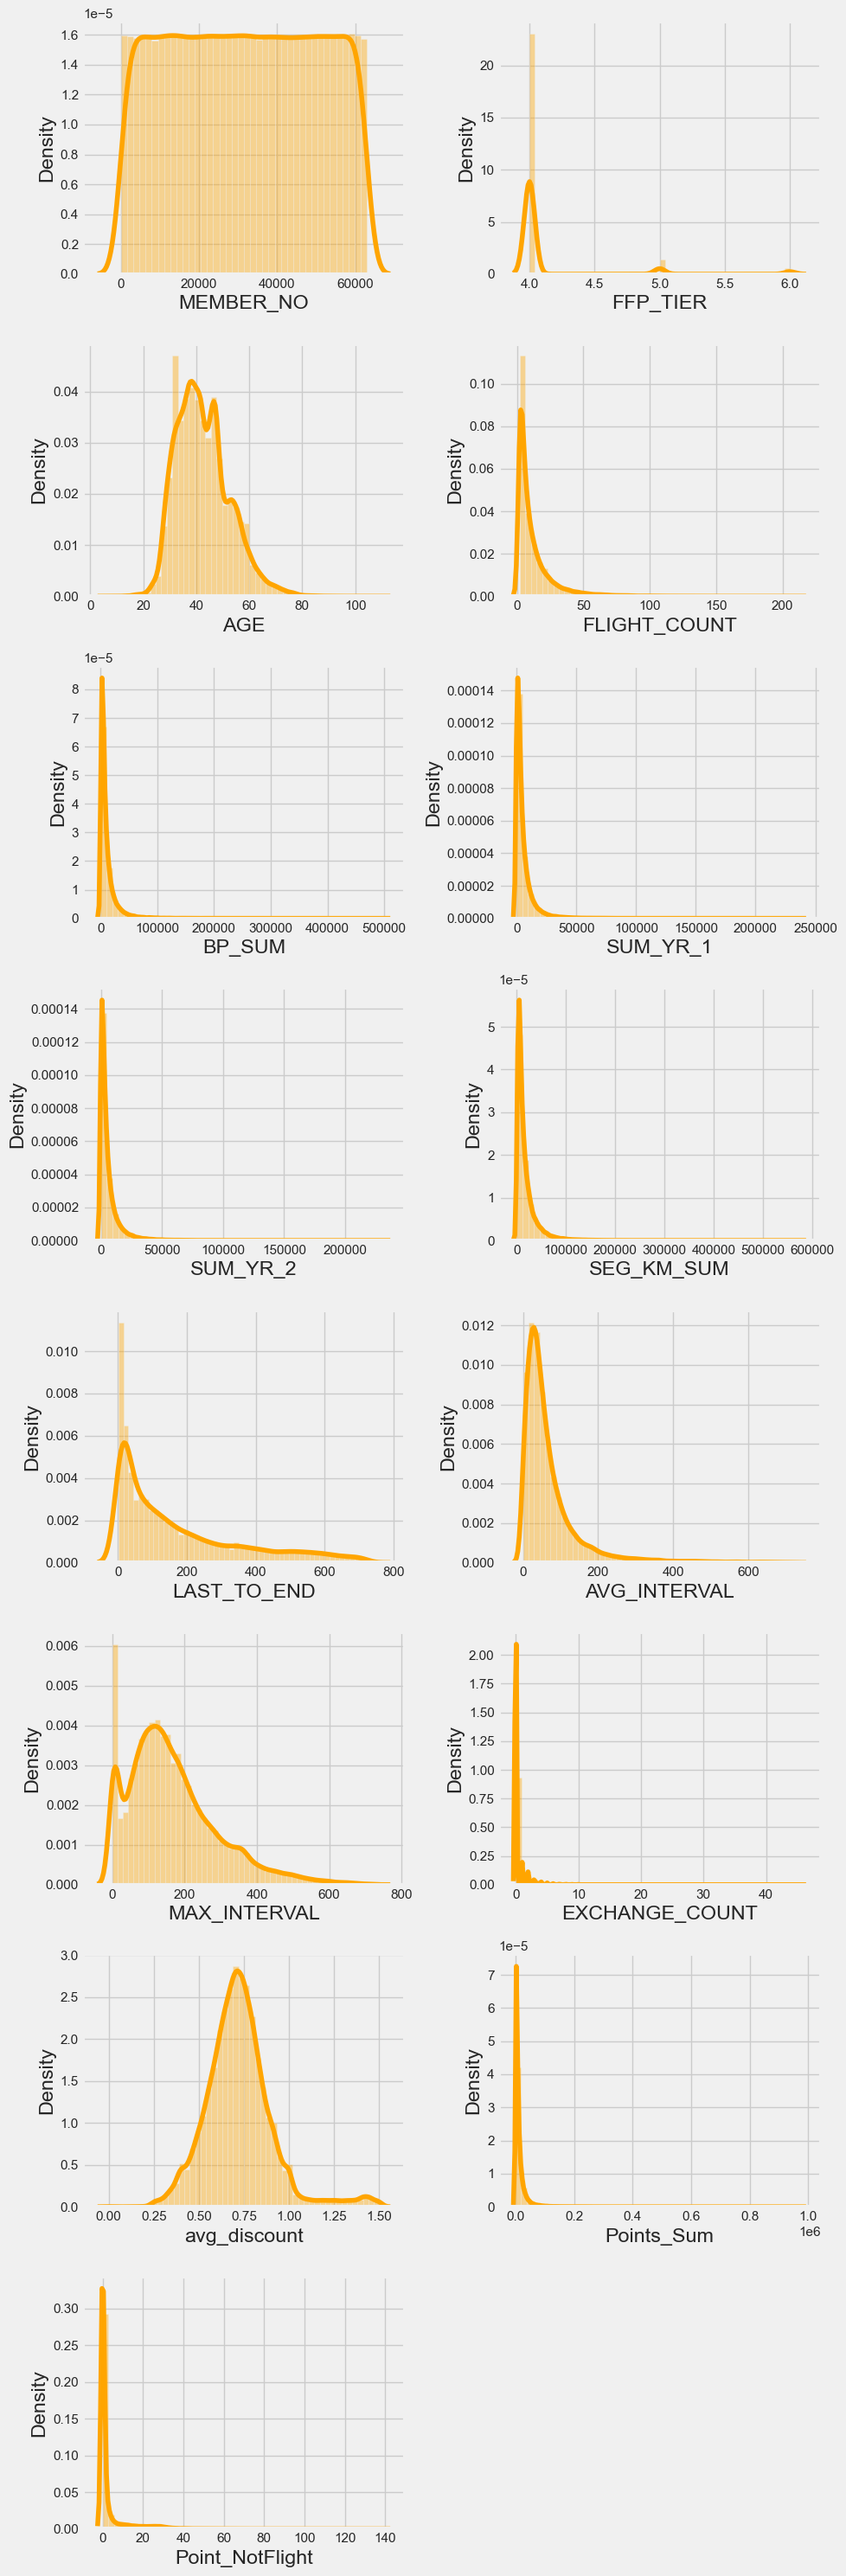

In [24]:
plt.figure(figsize=(10, 30))
for i in range(0, len(numeric)):
    plt.subplot(8, 2,i+1)
    sns.distplot(df[numeric[i]], color='orange')
    plt.tight_layout()

Based on the observations from the Dist Plot:

Most columns seem to display a positively skewed distribution, except for the MEMBER_NO, FFP_TIER, and avg_discount columns.

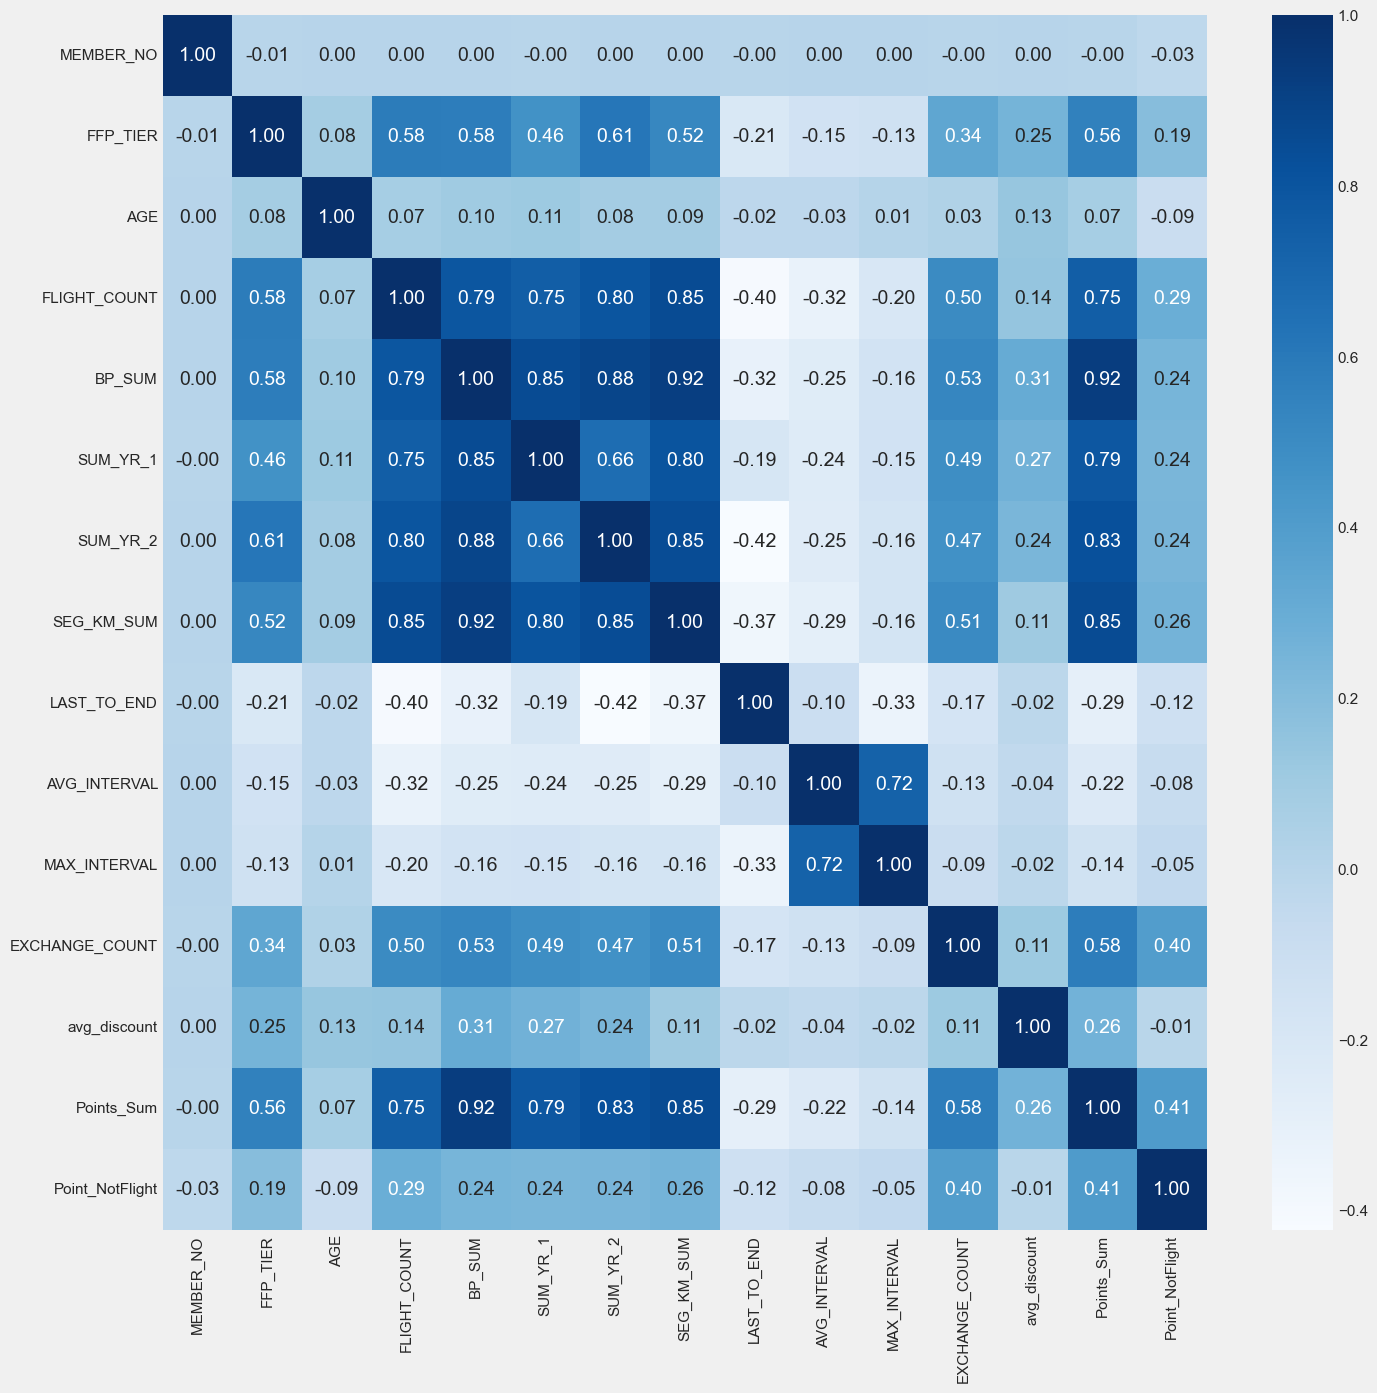

In [25]:
plt.figure(figsize=(15, 15))
sns.heatmap(df[numeric].corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

It can be seen that there is a correlation between several attributes, assuming > 0.5 has a fairly strong positive correlation:

1. BP_SUM correlation with FLIGHT_COUNT = 0.79
2. BP_SUM correlation with FFP_TIER = 0.58
3. BP_SUM correlation with EXCHANGE_COUNT = 0.53
4. Correlation of FLIGHT_COUNT with FFP_TIER = 0.58
5. Correlation SUM_YR_1 with FLIGHT_COUNT = 0.75
6. Correlation SUM_YR_1 with BP_SUM = 0.85
7. Correlation SUM_YR_1 with SUM_YR_2 = 0.66
8. Correlation of SUM_YR_1 with SEG_KM_SUM = 0.80
9. Correlation SUM_YR_1 with Points_Sum = 0.79
10. Correlation SUM_YR_2 with FFP_TIER = 0.61
11. Correlation of SUM_YR_2 with FLIGHT_COUNT = 0.80
12. Correlation of SUM_YR_2 with BP_SUM = 0.88
13. Correlation of SUM_YR_2 with SEG_KM_SUM = 0.85
14. Correlation SUM_YR_2 with Points_Sum = 0.83
15. SEG_KM_SUM correlation with FFP_TIER = 0.52
16. SEG_KM_SUM correlation with FLIGHT_COUNT = 0.85
17. SEG_KM_SUM correlation with BP_SUM = 0.92
18. Correlation of SEG_KM_SUM with EXCHANGE_COUNT = 0.51
19. Points_Sum correlation with FFP_TIER = 0.56
20. Points_Sum correlation with FLIGHT_COUNT = 0.75
21. Points_Sum correlation with BP_SUM = 0.92
22. Points_Sum correlation with SEG_KM_SUM = 0.85
23. Points_Sum correlation with EXCHANGE_COUNT = 0.58
24. Correlation MAX_INTERVAL with AVG_INTERVAL = 0.72

<Figure size 1500x1500 with 0 Axes>

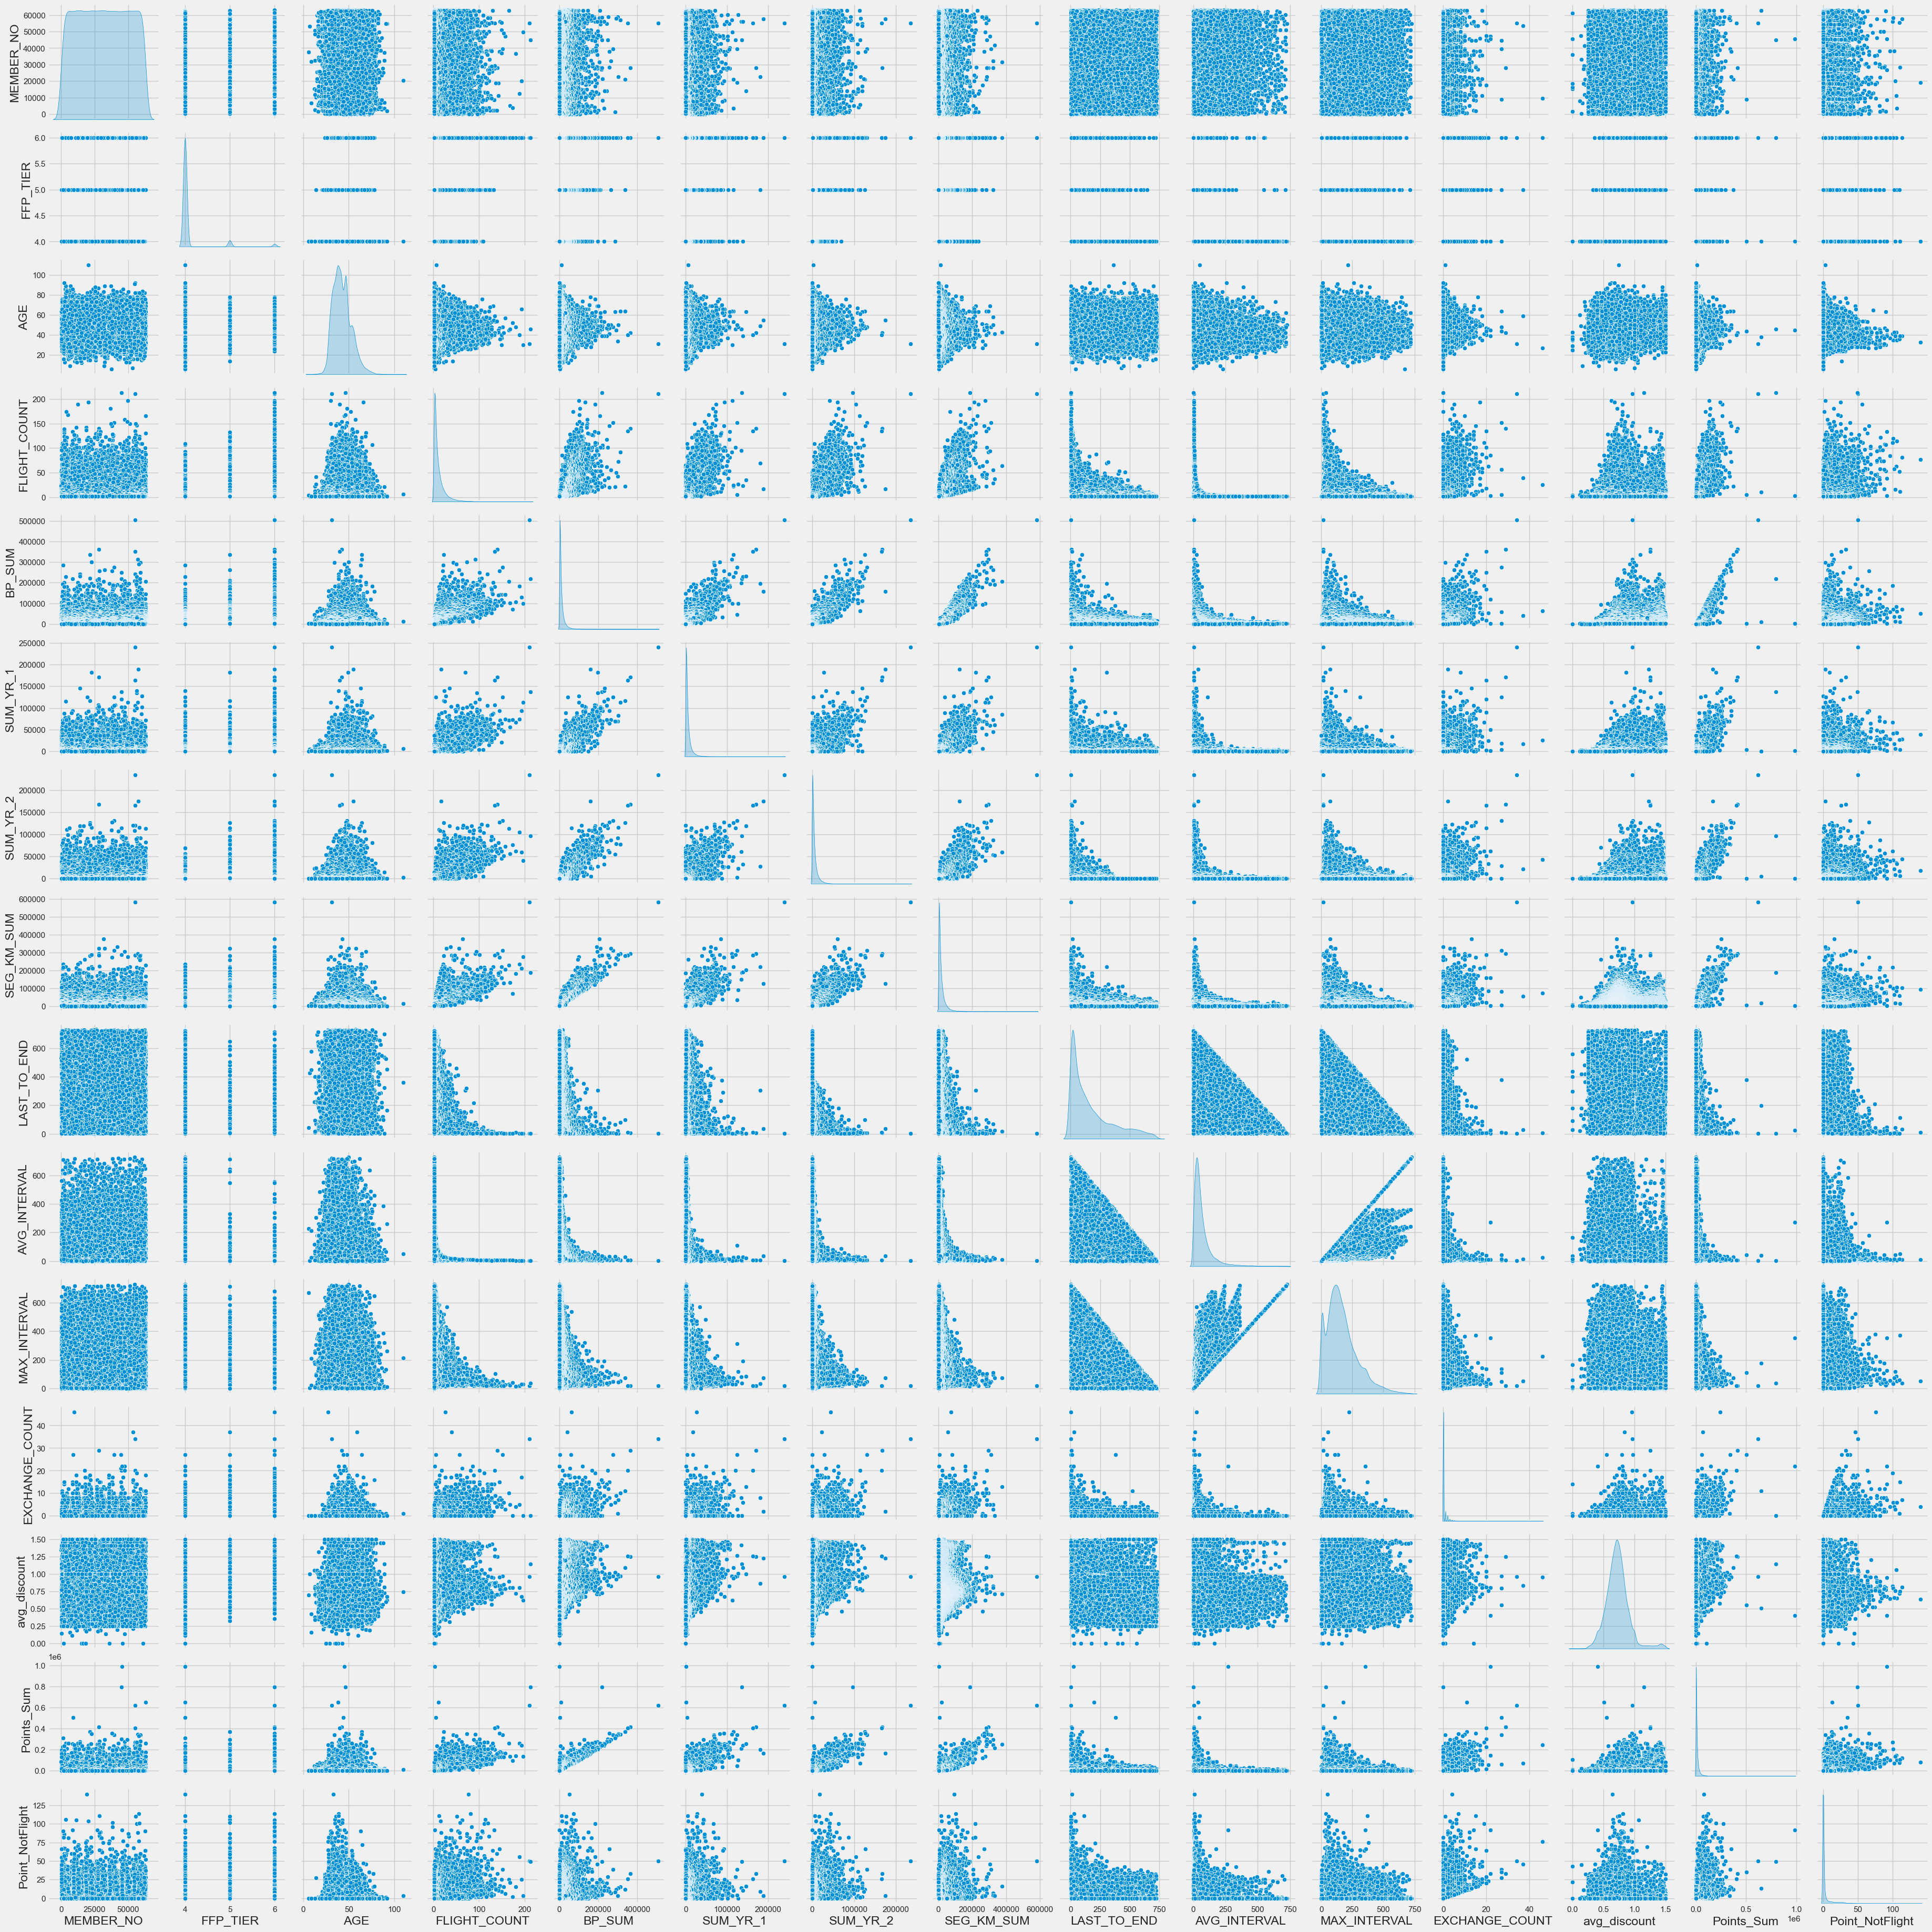

In [70]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde')
plt.show()

In pairplot, it can be seen that there is a linear correlation between several columns

__SUMMARY__

Some of the things we found from this EDA dataset are:

The data looks valid and there are no defects.
The majority of numeric columns have a positive skewed distribution, this must be remembered if we want to do something or use a model that requires the assumption of a normal distribution.
The majority of numeric columns also have outliers, except for the FFP_TIER and MEMBER_DURATION . columns
The majority of categorical columns have a large number of uniques except for the GENDER and LOAD_TIME . columns
Many columns have a strong positive correlation with each other

In [26]:
df[df.AGE > 100]

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER    WORK_CITY  \
23268      20264 2005-04-14        2005-05-18  Female         4  shenzhenshi   

      WORK_PROVINCE WORK_COUNTRY  AGE  LOAD_TIME  ...  SUM_YR_2  SEG_KM_SUM  \
23268     guangdong           CN  110 2014-03-31  ...    2888.0       14053   

       LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  \
23268        2013-04-06          361     50.333333          214   

       EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  
23268               1      0.740881       11194                3  

[1 rows x 23 columns]

In [27]:
df.drop(df[df.AGE > 100].index, inplace = True)

In [28]:
df[(df.SUM_YR_1 == 0) & (df.SUM_YR_2 == 0) & (df.avg_discount == 0) & (df.SEG_KM_SUM > 0)]

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER  WORK_CITY  \
62980       1761 2012-08-07        2012-09-09  Female         4   shenzhen   
62981      15206 2011-12-02        2011-12-02  Female         4  guangzhou   
62982      16415 2013-01-20        2013-01-20  Female         4    beijing   
62983      18375 2011-05-20        2013-06-05  Female         4  guangzhou   
62984      36041 2010-03-08        2013-09-14    Male         4     foshan   
62985      45690 2006-03-30        2006-12-02  Female         4  guangzhou   
62986      61027 2013-02-06        2013-02-14  Female         4  guangzhou   

      WORK_PROVINCE WORK_COUNTRY  AGE  LOAD_TIME  ...  SUM_YR_2  SEG_KM_SUM  \
62980     guangdong           CN   29 2014-03-31  ...       0.0        6138   
62981     guangdong           CN   42 2014-03-31  ...       0.0        2158   
62982             .           CN   35 2014-03-31  ...       0.0        3848   
62983     guangdong           CN   25 2014-03-31  ...       0.0        1134   
62984     guangdong           CN   38 2014-03-31  ...       0.0        8016   
62985     guangdong           CN   43 2014-03-31  ...       0.0        2594   
62986     guangdong           CN   36 2014-03-31  ...       0.0        3934   

       LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  \
62980        2012-09-21          558          12.0           12   
62981        2013-10-06          178           3.0            3   
62982        2013-01-20          437           0.0            0   
62983        2013-06-09          297           4.0            4   
62984        2014-01-03           89          37.0           60   
62985        2014-03-03           29         166.0          166   
62986        2013-02-26          400          12.0           12   

       EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  
62980               0           0.0           0                0  
62981               0           0.0           0                0  
62982               0           0.0           0                0  
62983               1           0.0       12318               22  
62984              14           0.0      106972               43  
62985               0           0.0           0                0  
62986               0           0.0           0                0  

[7 rows x 23 columns]

In [29]:
df.drop(df[(df.SUM_YR_1 == 0) & (df.SUM_YR_2 == 0) & (df.avg_discount == 0) & (df.SEG_KM_SUM > 0)].index, inplace = True)

In [30]:
print('Total Row', df.shape[0], ', Total Feature', df.shape[1],'\n')

Total Row 61429 , Total Feature 23 



In [31]:
df_select = df.copy()

In [32]:
df_select = df_select[['LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount']]
df_select.sample(5)

LAST_TO_END  FLIGHT_COUNT  SEG_KM_SUM  avg_discount
14400           85            16       17141      0.961944
11030          615             4       27244      0.750000
42991          118             5        4066      0.985349
30557           25             5       10688      0.681836
51214           48             7        4060      0.632857

In [33]:
df_select.describe().apply(lambda x: x.apply('{0:.5f}'.format))

LAST_TO_END FLIGHT_COUNT    SEG_KM_SUM avg_discount
count  61429.00000  61429.00000   61429.00000  61429.00000
mean     173.55024     11.94096   17277.61092      0.72173
std      181.47395     14.11951   21055.46042      0.18470
min        1.00000      2.00000     368.00000      0.11204
25%       28.00000      3.00000    4850.00000      0.61257
50%      107.00000      7.00000   10150.00000      0.71181
75%      262.00000     15.00000   21433.00000      0.80900
max      731.00000    213.00000  580717.00000      1.50000

In [34]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

norm_col = ['LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM']

for col in norm_col:
  df_select[col + '_NORM'] = MinMaxScaler().fit_transform(df_select[col].values.reshape(len(df_select), 1))

# Standardization
df_select['avg_discount_STD'] = StandardScaler().fit_transform(df_select['avg_discount'].values.reshape(len(df_select), 1))

In [35]:
df_select.describe().apply(lambda x: x.apply('{0:.5f}'.format))

LAST_TO_END FLIGHT_COUNT    SEG_KM_SUM avg_discount LAST_TO_END_NORM  \
count  61429.00000  61429.00000   61429.00000  61429.00000      61429.00000   
mean     173.55024     11.94096   17277.61092      0.72173          0.23637   
std      181.47395     14.11951   21055.46042      0.18470          0.24859   
min        1.00000      2.00000     368.00000      0.11204          0.00000   
25%       28.00000      3.00000    4850.00000      0.61257          0.03699   
50%      107.00000      7.00000   10150.00000      0.71181          0.14521   
75%      262.00000     15.00000   21433.00000      0.80900          0.35753   
max      731.00000    213.00000  580717.00000      1.50000          1.00000   

      FLIGHT_COUNT_NORM SEG_KM_SUM_NORM avg_discount_STD  
count       61429.00000     61429.00000      61429.00000  
mean            0.04711         0.02914         -0.00000  
std             0.06692         0.03628          1.00001  
min             0.00000         0.00000         -3.30102  
25%             0.00474         0.00772         -0.59101  
50%             0.02370         0.01686         -0.05371  
75%             0.06161         0.03630          0.47251  
max             1.00000         1.00000          4.21383

In [36]:
df_select_std = df_select.copy()
df_select_std = df_select_std[['LAST_TO_END_NORM', 'FLIGHT_COUNT_NORM', 'SEG_KM_SUM_NORM', 'avg_discount_STD']]

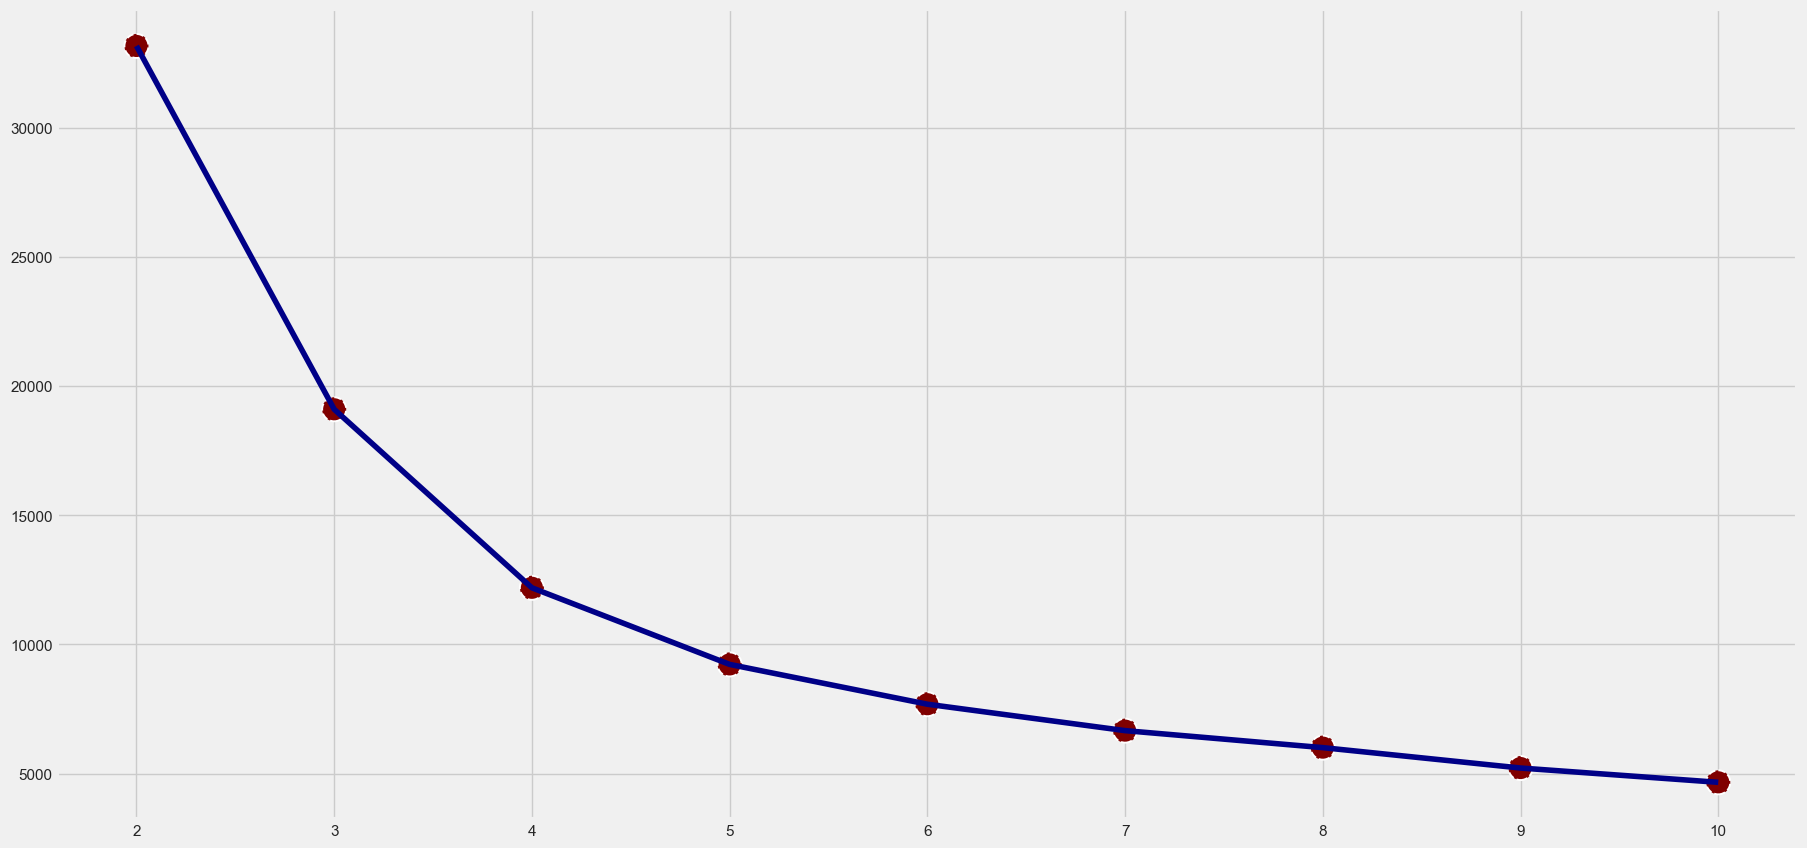

In [37]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_select_std)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(20, 10))

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')
plt.show()

In [38]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2,11))
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(df_select_std)
    preds = kmeans.predict(df_select_std)
     
    score_euclidean = silhouette_score(df_select_std, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

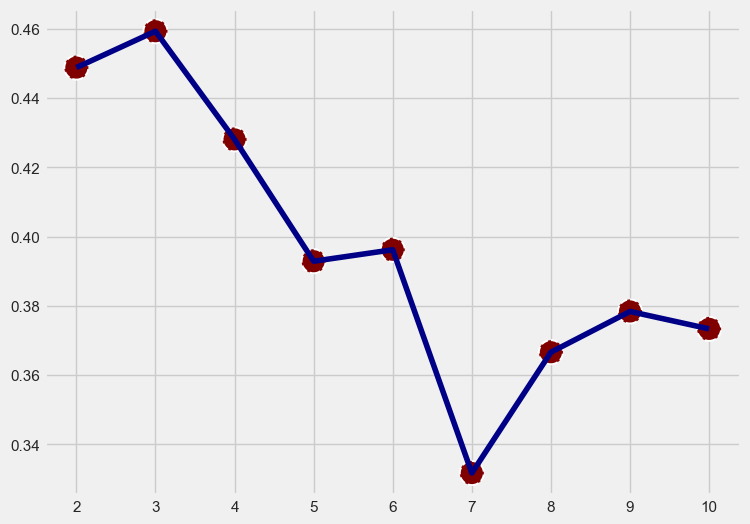

In [39]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')
plt.show()

Seen from the evaluation using Inertia or Silhouette Score, information obtained the ideal number of clusters is 3 clusters

__CREATE CLUSTER__

In [41]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_select_std)

In [42]:
clusters = kmeans.labels_

In [43]:
df['clusters'] = clusters

__PCA__

In [45]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)

pca.fit(df_select_std)
pcs = pca.transform(df_select_std)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca.head()

PC 1      PC 2
0  1.312882 -0.389055
1  2.881430 -0.304436
2  2.893891 -0.295219
3  2.001389 -0.122883
4  1.357215 -0.325192

In [46]:
df_pca['clusters'] = clusters
df_pca.head(2)

PC 1      PC 2  clusters
0  1.312882 -0.389055         0
1  2.881430 -0.304436         2

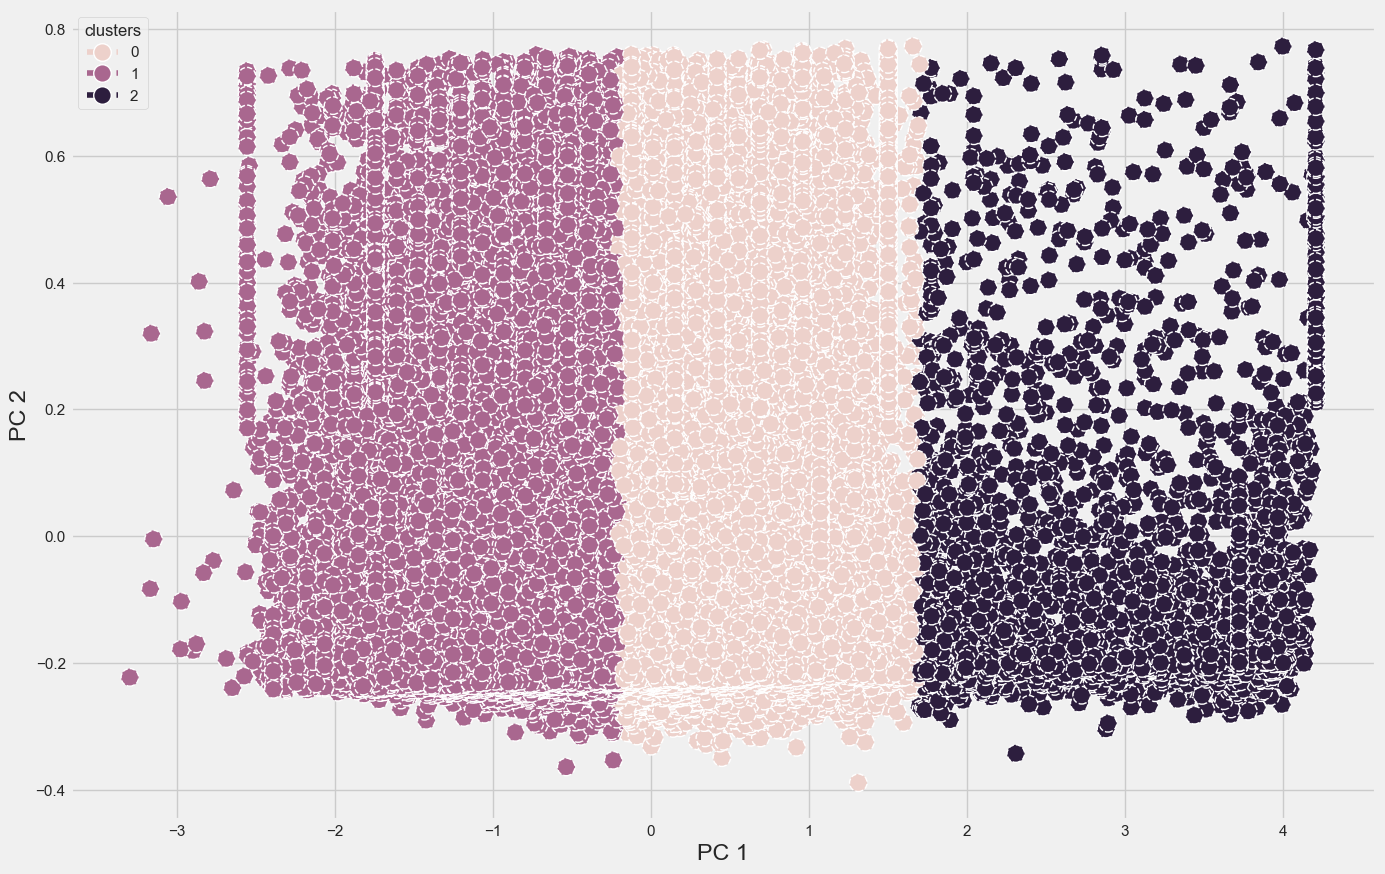

In [47]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x='PC 1', y='PC 2',
    hue='clusters',
    linestyle='--',
    data=df_pca,
    s=160,
    ax=ax
)

plt.show()

In [48]:
df[['LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'avg_discount', 'clusters']].groupby('clusters').median()

LAST_TO_END  FLIGHT_COUNT  SEG_KM_SUM  avg_discount
clusters                                                     
0               103.0           8.0     10829.0      0.782554
1               114.0           6.0      9197.0      0.591464
2                78.0           9.0     12885.5      1.274998

In [49]:
df['clusters'].value_counts().to_frame().reset_index().rename(columns={"index": "clusters", "clusters": "total_members"})

total_members  count
0              0  33040
1              1  25815
2              2   2574

-Cluster 0 (middle value customer):
1. Mid-level flight recency
2. Mid-level flight frequency
3. Mid-level airline mileage
4. The middle level of average discount, shows the middle level of flight class
5. Highest number of cluster members
6. As a potential customer, airline can encourage these customers to increase transactions

-Cluster 1 (low value customer):
1. Highest level flight recency (longest)
2. Lowest rate flight frequency
3. Lowest level of airline mileage
4. In the average discount level, it shows the lower level flight class
5. Middle number of cluster members
6. Airline needs to increase interaction with these customers and needs to take certain marketing strategies to extend this customer cycle

-Cluster 2 (high value customers):
1. Lowest level flight recency (most recent)
2. Highest level of flight frequency
3. Highest level of airline mileage
4. The highest level of average discount, shows the highest level of flight class
5. Longest membership duration
6. Lowest number of cluster members